In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from keras.models import Sequential
from keras.layers import Dense
from sklearn import tree
from xgboost import plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
df = pd.read_csv(r"/content/meteor.csv")
df.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,17,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,1
1,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,18.113985,65210.346095,40519.173105,0.383014,148.992630,57298148.0,35603420.0,21,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,0
2,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,7.590711,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,22,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,1
3,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,11.173874,40225.948191,24994.839864,0.285322,110.990387,42683616.0,26522368.0,7,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,0
4,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,9.840831,35426.991794,22012.954985,0.407832,158.646713,61010824.0,37910368.0,25,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,1


In [ ]:
df.shape

(4687, 33)

In [ ]:
df['Hazardous'].value_counts()

0    3932
1     755
Name: Hazardous, dtype: int64

In [ ]:
X, y = df.iloc[: , :-1], df.iloc[: , -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Naive Bayes

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train,y_train)
print("Accuracy of train:",nb_model.score(X_train,y_train))
print("Accuracy of test:",nb_model.score(X_test,y_test))

Accuracy of train: 0.9213414634146342
Accuracy of test: 0.9282160625444208


In [ ]:
pred = nb_model.predict(X_test)

In [ ]:
print("Accuracy {} ".format(accuracy_score(y_test,pred)))

Accuracy 0.9282160625444208 


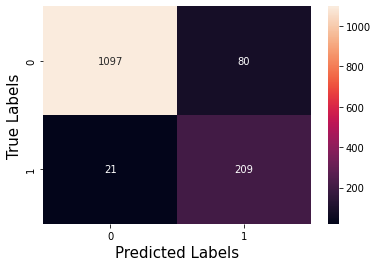

In [ ]:
cm = confusion_matrix(y_test, pred)
ax =sns.heatmap(cm, annot=True, fmt='g')

ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

# Logistic Regression

In [ ]:
lr_model = LogisticRegression()
lr_model = lr_model.fit(X_train,y_train)
print("Accuracy of train",lr_model.score(X_train,y_train))

Accuracy of train 0.9576219512195122


In [ ]:
pred = lr_model.predict(X_test)

In [ ]:
print("Accuracy {}".format(accuracy_score(y_test,pred)))

Accuracy 0.9580668088130775


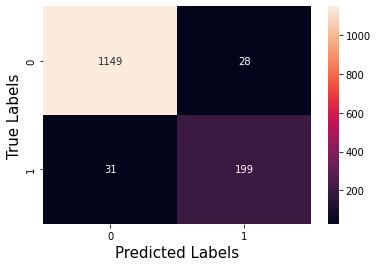

In [ ]:
cm = confusion_matrix(y_test,pred)
ax = sns.heatmap(cm,annot=True,fmt='g')
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

# Random Forest

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
pred = rf_model.predict(X_test)

In [ ]:
print("Accuracy {}".format(accuracy_score(y_test,pred)))

Accuracy 0.9914712153518124


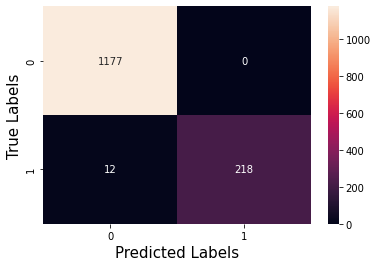

In [ ]:
cm = confusion_matrix(y_test,pred)
ax = sns.heatmap(cm,annot=True,fmt='g')
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

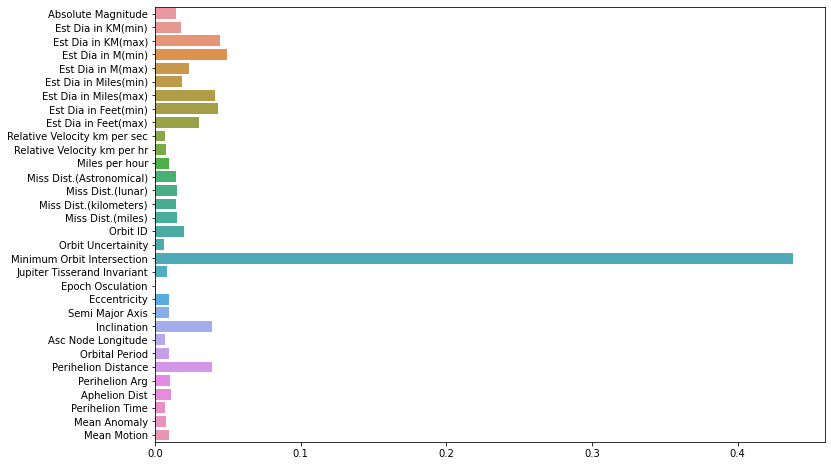

In [ ]:
#Feature Importance
plt.figure(figsize=(12, 8))
sns.barplot(x=rf_model.feature_importances_, y=X.columns)
plt.show()

# Decision Tree

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model = dt_model.fit(X_train,y_train)

[Text(558.0, 513.4, 'X[18] <= -0.369\ngini = 0.269\nsamples = 3280\nvalue = [2755, 525]'),
 Text(488.25, 453.0, 'X[8] <= -0.254\ngini = 0.432\nsamples = 1665\nvalue = [1140, 525]'),
 Text(279.0, 392.6, 'X[7] <= -0.289\ngini = 0.016\nsamples = 1148\nvalue = [1139, 9]'),
 Text(209.25, 332.2, 'gini = 0.0\nsamples = 1108\nvalue = [1108, 0]'),
 Text(348.75, 332.2, 'X[17] <= -0.33\ngini = 0.349\nsamples = 40\nvalue = [31, 9]'),
 Text(279.0, 271.8, 'X[29] <= 0.209\ngini = 0.476\nsamples = 23\nvalue = [14, 9]'),
 Text(209.25, 211.39999999999998, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(348.75, 211.39999999999998, 'X[21] <= 1.032\ngini = 0.492\nsamples = 16\nvalue = [7, 9]'),
 Text(279.0, 151.0, 'X[29] <= 0.405\ngini = 0.426\nsamples = 13\nvalue = [4, 9]'),
 Text(139.5, 90.59999999999997, 'X[30] <= -1.481\ngini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(69.75, 30.199999999999932, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(209.25, 30.199999999999932, 'gini = 0.0\nsamples = 8\n

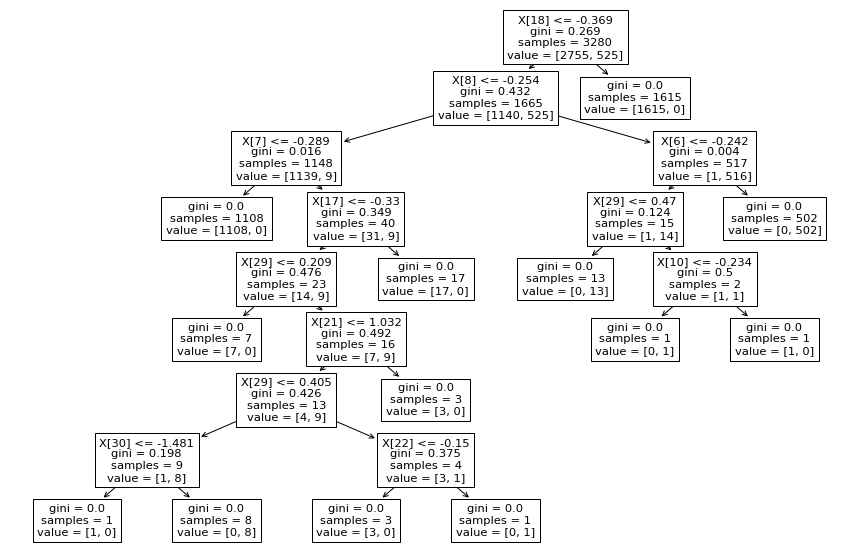

In [ ]:
plt.figure(figsize=(15, 10))
tree.plot_tree(dt_model)

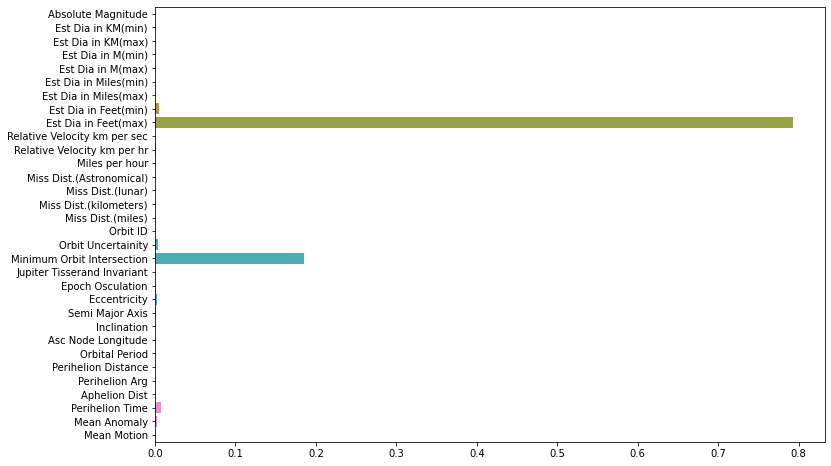

In [ ]:
#Feature Importance
plt.figure(figsize=(12, 8))
sns.barplot(x=dt_model.feature_importances_, y=X.columns)
plt.show()

In [ ]:
pred = dt_model.predict(X_test)

In [ ]:
print("Accuracy = {}".format(accuracy_score(y_test, pred)))

Accuracy = 0.9950248756218906


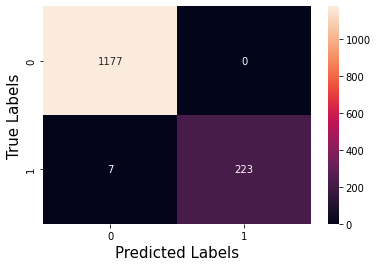

In [ ]:
cm = confusion_matrix(y_test, pred)
ax =sns.heatmap(cm, annot=True, fmt='g')
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()